5# Minimum Dominating Set Algorithm

##### Necessary Libraries

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import matplotlib.pyplot as plt
import numpy as np
import math
import unittest
from timeit import default_timer as timer
import pandas as pd
import timeit
from scipy import stats, optimize


##### Random Sample Generator

In [ ]:
def random_adjacency_matrix(n):
    """
    Random adjacency matrix generator for a given number of nodes.

    Parameters:
    n: Number of nodes

    Returns a matrix representation of the generated graph.
    """ 
    matrix = [[random.randint(0, 1) for i in range(n)] for j in range(n)]

    # No vertex connects to itself
    for i in range(n):
        matrix[i][i] = 0

    # If i is connected to j, j is connected to i
    for i in range(n):
        for j in range(n):
            matrix[j][i] = matrix[i][j]

    return matrix

##### Helper Functions Implementations

In [ ]:
def show_graph(graph):
    """
    Sketches a visualisation for the given the adjacency matrix representation of the graph.

    Parameters:
    graph: The adjacency matrix representation of the graph

    """ 
    G = nx.Graph()
    G.add_nodes_from(range(len(graph)))
    for i in range(len(graph)):
        for j in range(i, len(graph)):
            if graph[i][j] == 1:
                G.add_edge(i, j)

    nx.draw(G, with_labels=True)
    plt.figure(figsize=(4,4))
    plt.show()
    print("\n")

In [ ]:
def print_graph(graph):
    """
    Displays the adjacency matrix representation of the graph.

    Parameters:
    graph: The adjacency matrix representation of the graph
    
    """ 
    print("\nGRAPH REPRESENTATION\n")
    for i in range(len(graph)):
      print(graph[i])
    print("\n")

#### (A) Brute-Force Algortihm

In [ ]:
def is_dominating_set(graph, nodes):
    """
    Checking if a set of nodes is a dominating set for a graph represented as a matrix.

    Parameters:
    graph: The adjacency matrix representation of the graph
    nodes: The set of nodes to be checked

    True if the set is a dominating set, False otherwise
    """
    control = False
    n = len(graph)
    uncovered_nodes = set(range(n)) - set(nodes)
    for i in uncovered_nodes:
      for j in nodes:
        if graph[i][j] == 1:
          control = True
      if control == False:
        return control
      control = False
    
    return True

def find_subsets(s):
    subsets = [[]]
    for i in s:
        new_subsets = [subset + [i] for subset in subsets]
        subsets.extend(new_subsets)
    return subsets

def min_dominating_set(graph, subsets):
  min = float('inf')
  min_dom_set = []
  for subset in subsets:
    if is_dominating_set(graph, subset) and len(subset) < min:
      min_dom_set = subset
      min = len(subset) 
  return min_dom_set

#### (B) Heuristic Algorithm

In [ ]:
def assign_weights_degree(adj_matrix):
    num_vertices = len(adj_matrix)
    weights = [0] * num_vertices
    
    for vertex in range(num_vertices):
        weights[vertex] = np.sum(adj_matrix[vertex])
    
    return weights

In [ ]:
def find_dominant_set(adj_matrix, weights):
    num_vertices = len(adj_matrix)
    white_vertices = set(range(num_vertices))
    dominant_set = set()
    
    while white_vertices:
        max_weight = float('-inf')
        max_weight_vertex = None
        
        for vertex in white_vertices:
            if weights[vertex] > max_weight:
                max_weight = weights[vertex]
                max_weight_vertex = vertex
        
        dominant_set.add(max_weight_vertex)
        white_vertices.remove(max_weight_vertex)
        
        for vertex in range(num_vertices):
            if adj_matrix[max_weight_vertex][vertex] == 1:
                white_vertices.discard(vertex)
    
    return dominant_set

#### Main Function - (Brute Force Algorithm)

In [ ]:
number_of_samples = int(input("Number of samples required: "))
print("\n")

for i in range(number_of_samples):
  n = int(input("Indicate number of nodes: "))
  graph = random_adjacency_matrix(n) #generating the adjacency matrix representation of a graph with n nodes
  #print_graph(graph)
  show_graph(graph)

  subsets = find_subsets(set(range(len(graph))))
  min_dom_set = min_dominating_set(graph, subsets)
  print("Minimum Dominating Set: ", min_dom_set, "\n \n")

Number of samples required: 0




#### Main Function - (Heuristic Algorithm)

In [ ]:
number_of_samples = int(input("Number of samples required: "))
print("\n")

for i in range(number_of_samples):
  n = int(input("Indicate number of nodes: "))
  graph = random_adjacency_matrix(n) #generating the adjacency matrix representation of a graph with n nodes
  #print_graph(graph)
  show_graph(graph)

  weights = assign_weights_degree(graph)
  min_dom_set = find_dominant_set(graph, weights)
  print("Minimum Dominating Set: ", min_dom_set, "\n \n")

Number of samples required: 0




## Experimental Analysis

### 1. Experimental Analysis of The Performance (Performance Testing)

    NumNodes  MeanTime   Lower90   Upper90   Lower95   Upper95
0          1  0.003866  0.003745  0.003987  0.003721  0.004011
1          2  0.003928  0.003830  0.004027  0.003811  0.004046
2          3  0.003920  0.003843  0.003997  0.003827  0.004013
3          4  0.003936  0.003851  0.004021  0.003834  0.004038
4          5  0.004052  0.003911  0.004194  0.003883  0.004222
5          6  0.006345  0.006035  0.006656  0.005974  0.006717
6          7  0.003783  0.003709  0.003857  0.003695  0.003872
7          8  0.003854  0.003763  0.003946  0.003744  0.003964
8          9  0.003950  0.003781  0.004119  0.003748  0.004153
9         10  0.003990  0.003866  0.004113  0.003841  0.004138
10        11  0.003964  0.003869  0.004059  0.003850  0.004078
11        12  0.003986  0.003838  0.004134  0.003808  0.004163
12        13  0.006125  0.005800  0.006450  0.005736  0.006514
13        14  0.003976  0.003871  0.004080  0.003851  0.004100
14        15  0.003904  0.003835  0.003973  0.003821  0

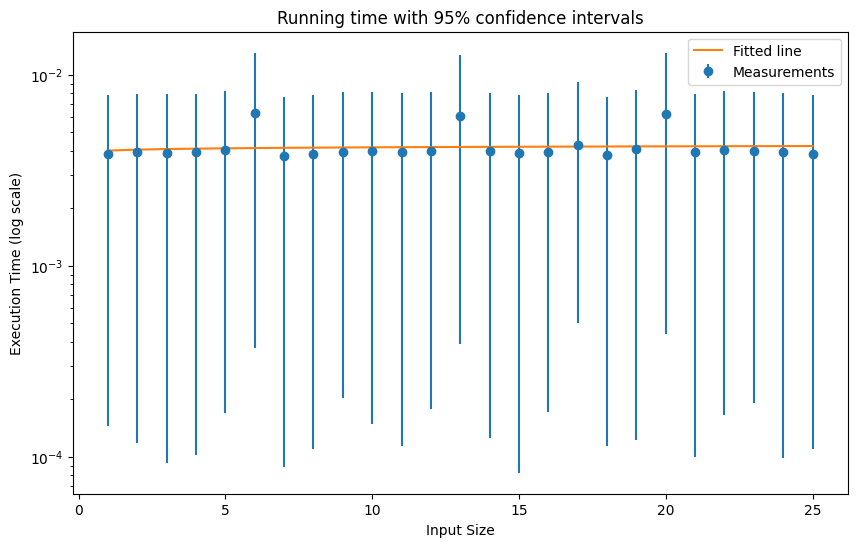

The fitted line has the equation: y = 0.004013505707700045 * x^0.017186036580502374


In [ ]:
# num of nodes ranges from 1 to 25
num_nodes_range = [i for i in range(1,26)]

# num of trials for each size
num_trials = 50

mean_times = []
lower_bound_90 = []
upper_bound_90 = []
lower_bound_95 = []
upper_bound_95 = []

for num_nodes in num_nodes_range:
    times = []
    for _ in range(num_trials):
        graph = random_adjacency_matrix(n) #generating the adjacency matrix representation of a graph with n nodes
        start = timeit.default_timer()
        weights = assign_weights_degree(graph)
        min_dom_set = find_dominant_set(graph, weights)
        end = timeit.default_timer()
        times.append(end - start)
    
    # Calculate mean and CIs
    mean_time = np.mean(times)
    conf_int_90 = stats.t.interval(0.90, len(times)-1, loc=mean_time, scale=stats.sem(times))
    conf_int_95 = stats.t.interval(0.95, len(times)-1, loc=mean_time, scale=stats.sem(times))
    
    mean_times.append(mean_time)
    lower_bound_90.append(conf_int_90[0])
    upper_bound_90.append(conf_int_90[1])
    lower_bound_95.append(conf_int_95[0])
    upper_bound_95.append(conf_int_95[1])

df = pd.DataFrame({
    "NumNodes": num_nodes_range,
    "MeanTime": mean_times,
    "Lower90": lower_bound_90,
    "Upper90": upper_bound_90,
    "Lower95": lower_bound_95,
    "Upper95": upper_bound_95
})

print(df)

# Fitting a line for the measurement values
log_x = np.log(num_nodes_range)
log_y = np.log(mean_times)
params = np.polyfit(log_x, log_y, 1)

plt.figure(figsize=(10, 6))
plt.errorbar(num_nodes_range, mean_times, yerr=[lower_bound_95, upper_bound_95], fmt='o', label='Measurements')
plt.plot(num_nodes_range, np.exp(params[1]) * np.power(num_nodes_range, params[0]), label='Fitted line')
plt.yscale('log')
plt.xlabel('Input Size')
plt.ylabel('Execution Time (log scale)')
plt.title('Running time with 95% confidence intervals')
plt.legend()
plt.show()

print(f"The fitted line has the equation: y = {np.exp(params[1])} * x^{params[0]}")

### 2. Experimental Analysis of the Quality

In [ ]:
number_of_samples = int(input("Number of samples required: "))
print("\n")

for i in range(number_of_samples):
  n = int(input("Indicate number of nodes: "))
  graph = random_adjacency_matrix(n) #generating the adjacency matrix representation of a graph with n nodes
  #print_graph(graph)
  show_graph(graph)

  ### BRUTE-FORCE ALGORITHM
  subsets = find_subsets(set(range(len(graph))))
  min_dom_set = min_dominating_set(graph, subsets)
  print("Minimum Dominating Set (Brute-Force): ", min_dom_set, "\n")


  weights = assign_weights_degree(graph)
  min_dom_set = find_dominant_set(graph, weights)
  print("Minimum Dominating Set (Heuristic): ", min_dom_set, "\n")

Number of samples required: 0




### 3. Experimental Analysis of the Correctness (Functional Testing) 

#### a. Black Box Testing

For Black Box Testing, we tested out algorithm based on some extreme, and edge cases.

Test Case 1 successful!



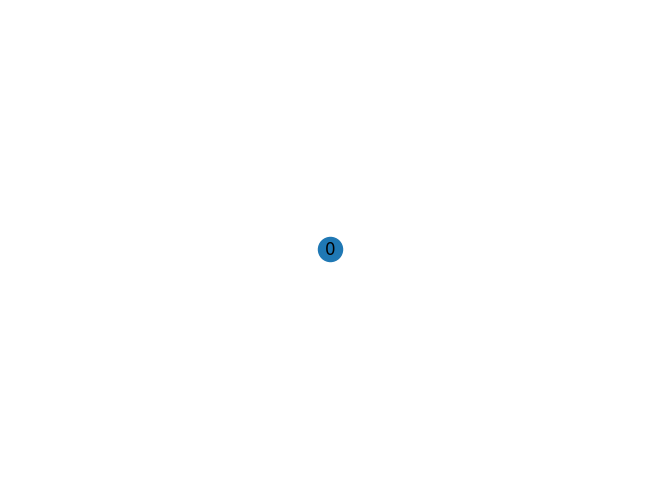

<Figure size 400x400 with 0 Axes>



Test Case 2 successful!



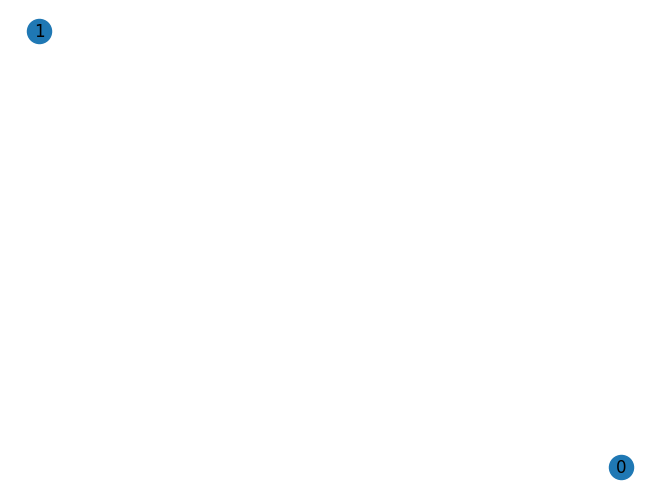

<Figure size 400x400 with 0 Axes>



Test Case 3 successful!



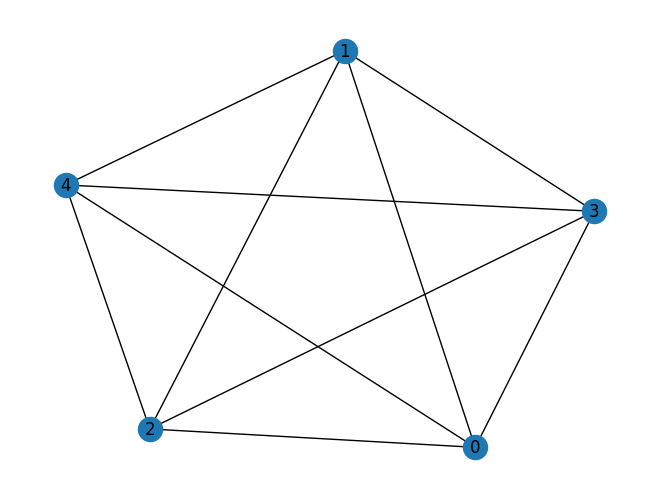

<Figure size 400x400 with 0 Axes>



Test Case 4 successful!



In [ ]:
def TestCase1():
# Test case 1: Empty adjacency matrix
  adj_matrix = []
  weights = assign_weights_degree(adj_matrix)
  result = find_dominant_set(adj_matrix, weights)
  if result == set():
    print("Test Case 1 successful!\n")
  else:
    print("Test Case 1 failed!\n")

def TestCase2():
 # Test case 2: Single vertex
  adj_matrix = [[0]]
  weights = assign_weights_degree(adj_matrix)
  result = find_dominant_set(adj_matrix, weights)
  show_graph(adj_matrix)
  if result == {0}:
    print("Test Case 2 successful!\n")
  else:
    print("Test Case 2 failed!\n")

def TestCase3():
# Test case 3: Two disconnected vertices
  adj_matrix = [[0, 0],
                [0, 0]]
  weights = assign_weights_degree(adj_matrix)
  result = find_dominant_set(adj_matrix, weights)
  show_graph(adj_matrix)
  if result == {0, 1}:
    print("Test Case 3 successful!\n")
  else:
    print("Test Case 3 failed!\n")

def TestCase4():
# Test case 4: Five vertices, complete graph
  adj_matrix = [[0, 1, 1, 1, 1],
                [1, 0, 1, 1, 1],
                [1, 1, 0, 1, 1],
                [1, 1, 1, 0, 1],
                [1, 1, 1, 1, 0]]
  weights = assign_weights_degree(adj_matrix)
  result = find_dominant_set(adj_matrix, weights)
  show_graph(adj_matrix)
  if result == {0} or result == {1} or result == {2} or result == {3}:
    print("Test Case 4 successful!\n")
  else:
    print("Test Case 4 failed!\n")

TestCase1()
TestCase2()
TestCase3()
TestCase4()

#### b. White Box Testing

Statements covered in assign_weights_degree function are: {1, 2, 3, 4}
Statement Coverage is: 100.0%. 


Statements covered in find_dominant_set function are: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
Statement Coverage is: 100.0%. 

Decisions covered in find_dominant_set function are: {1, 2}
Decision Coverage is: 100.0%. 



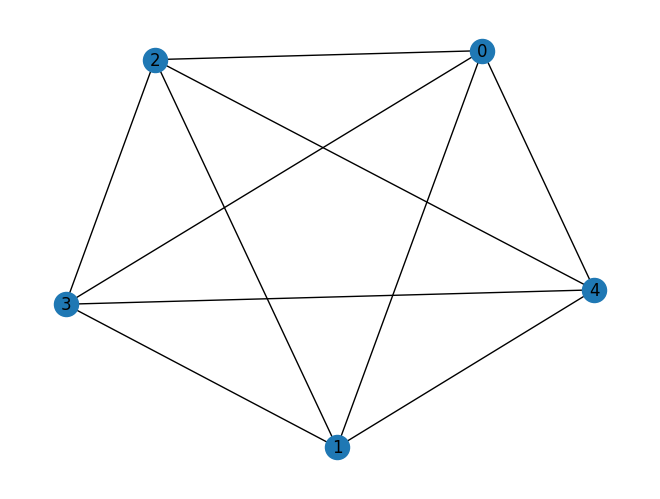

<Figure size 400x400 with 0 Axes>

In [ ]:
def assign_weights_degree_test(adj_matrix):
    statements_convered = []
    num_vertices = len(adj_matrix)
    statements_convered.append(1)
    weights = [0] * num_vertices
    statements_convered.append(2)
    
    for vertex in range(num_vertices):
        statements_convered.append(3)
        weights[vertex] = np.sum(adj_matrix[vertex])
        statements_convered.append(4)
    print("Statements covered in assign_weights_degree function are:", set(statements_convered))
    print(f"Statement Coverage is: {(len(set(statements_convered))/4)*100}%. \n\n")
    return weights

def find_dominant_set_test(adj_matrix, weights):
    statements_convered = []
    decision_convered = []
    num_vertices = len(adj_matrix)
    statements_convered.append(1)
    white_vertices = set(range(num_vertices))
    statements_convered.append(2)
    dominant_set = set()
    statements_convered.append(3)
    
    while white_vertices:
        statements_convered.append(4)
        max_weight = float('-inf')
        statements_convered.append(5)
        max_weight_vertex = None
        statements_convered.append(6)
        
        for vertex in white_vertices:
            statements_convered.append(7)
            if weights[vertex] > max_weight:
                decision_convered.append(1)
                statements_convered.append(8)
                max_weight = weights[vertex]
                statements_convered.append(9)
                max_weight_vertex = vertex
                statements_convered.append(10)
        
        dominant_set.add(max_weight_vertex)
        statements_convered.append(11)
        white_vertices.remove(max_weight_vertex)
        statements_convered.append(12)
        
        for vertex in range(num_vertices):
            statements_convered.append(13)
            if adj_matrix[max_weight_vertex][vertex] == 1:
                decision_convered.append(2)
                statements_convered.append(14)
                white_vertices.discard(vertex)
                statements_convered.append(15)

    print("Statements covered in find_dominant_set function are:", set(statements_convered))
    print(f"Statement Coverage is: {(len(set(statements_convered))/15)*100}%. \n")
    print("Decisions covered in find_dominant_set function are:", set(decision_convered))
    print(f"Decision Coverage is: {(len(set(decision_convered))/2)*100}%. \n")
    return dominant_set

adj_matrix = [[0, 1, 1, 1, 1],
              [1, 0, 1, 1, 1],
              [1, 1, 0, 1, 1],
              [1, 1, 1, 0, 1],
              [1, 1, 1, 1, 0]]

weights = assign_weights_degree_test(adj_matrix)
result = find_dominant_set_test(adj_matrix, weights)
show_graph(adj_matrix)